# box plot 

# Load library

In [48]:
library(ggplot2)
library(Hmisc)
source("./utilis/utilis.R")
library(glue)

# Set values & table names

In [49]:
threshold = 0.005
cutoff_column = 'padj'
data_df_path =  '../../output/hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/one_wayANOVA_hMinImp_TICnorm_groupFil0.3_HILICpos_fullreport.csv'
meta_df_path =  '../../input/sequence_file/clean_deduplicated_meta_df.csv'
annot_df_path = '../../input/HILICpos_mzML/asari_project_output_727153535/Feature_annotation.tsv'

# Prepare the data

## Read and transform the data table and metadata table

In [50]:
df = read.csv(data_df_path, row.names = 1, sep = ',')
meta_df = read.csv(meta_df_path, row.names = 1)
annot_df = read.csv(annot_df_path, sep = '\t')

----

In [51]:
head(df)

,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,⋯,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3,nist,q3June2014_1,q3June2014_2
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F1,85.0044,26.00,19.67,28.11,0,2003055,0.96,0.93,106,23,⋯,16.46507,17.00695,17.09726,17.05882,13.45488,15.26659,14.33267,16.25446,16.29809,16.52315
F100,130.9851,25.74,19.67,28.89,1936,3512837,1.00,0.97,217,24,⋯,16.23697,17.33909,17.29740,17.29246,11.81848,17.58103,17.49345,17.66144,17.55834,17.36552
F10000,393.2598,422.45,419.56,429.02,8551,3235844,1.00,0.90,148,17,⋯,15.61386,12.01507,12.01507,12.01507,16.84734,16.11733,17.20139,19.59158,16.12541,14.16461
F10004,393.2680,482.62,478.42,487.62,8553,1092807,0.91,0.97,51,11,⋯,16.88465,14.89055,14.89055,14.89055,16.86880,16.79105,17.52690,16.32349,15.94052,15.99033
F10006,409.2267,310.52,291.08,330.49,8979,10810474,1.00,0.95,161,24,⋯,19.20292,19.18923,19.07756,19.35677,18.49627,18.63580,18.40481,17.48562,18.17996,18.92816
F10007,409.2267,348.62,344.16,364.12,8979,2149563,1.00,0.90,69,24,⋯,13.63451,15.04201,13.74698,15.10940,12.87809,14.35426,14.57330,17.59065,16.99836,17.16847


In [52]:
grepl('Naive\\_[0-9]|R5pos\\_[0-9]|R5neg\\_[0-9]',colnames(df))

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[37]  TRUE FALSE FALSE FALSE

In [53]:
data_df = df[grepl('Naive\\_[0-9]|R5pos\\_[0-9]|R5neg\\_[0-9]',colnames(df))]

In [54]:
head(data_df)

,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F1,14.72954,16.52419,16.46507,17.00695,17.09726,17.05882,13.45488,15.26659,14.33267
F100,17.57323,17.42220,16.23697,17.33909,17.29740,17.29246,11.81848,17.58103,17.49345
F10000,15.98142,15.86099,15.61386,12.01507,12.01507,12.01507,16.84734,16.11733,17.20139
F10004,14.89055,14.89055,16.88465,14.89055,14.89055,14.89055,16.86880,16.79105,17.52690
F10006,18.79916,19.33012,19.20292,19.18923,19.07756,19.35677,18.49627,18.63580,18.40481
F10007,14.18142,14.40873,13.63451,15.04201,13.74698,15.10940,12.87809,14.35426,14.57330


----

In [55]:
head(meta_df)

,class,biological_samples,cell_number
,<chr>,<chr>,<int>
Naive_1,Naive,Yes,300
Naive_2,Naive,Yes,300
Naive_3,Naive,Yes,300
R5neg_1,R5neg,Yes,655
R5neg_2,R5neg,Yes,687
R5neg_3,R5neg,Yes,865


----

In [56]:
annot_df[1:10,]

,X.peak.id_number,mz,rtime,apex.scan.number.,X.EmpCpd.interim_id,X.EmpCpd.ion_relation,neutral_formula,neutral_formula_mass,name_1st_guess,matched_DB_shorts,matched_DB_records
,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,F4,105.0378,29.94454,112,0,anchor,None,None,,,
2,F61,106.0411,29.41904,110,0,13C/12C,None,None,,,
3,F869,123.0485,30.20728,113,0,"anchor,+H2O",None,None,,,
4,F1028,124.0516,25.74057,96,0,"13C/12C,+H2O",None,None,,,
5,F19,117.0334,29.94454,112,1,anchor,C5H8ClN,117.034527,,,
6,F330,118.0412,30.20728,113,1,H,C5H8ClN,117.034527,,,
7,F835,136.0518,29.68179,111,1,"H,+H2O",C5H8ClN,117.034527,,,
8,F20,130.0874,31.78377,119,2,anchor,None,None,,,
9,F222,131.0908,31.25828,117,2,13C/12C,None,None,,,


In [57]:
lookUpAnnot <- function(annot_df,
                        FeatureID,
                        look4column = 'name_1st_guess') {
    output = annot_df[annot_df[,'X.peak.id_number'] == FeatureID,look4column]
    return(output)
}

In [58]:
lookUpAnnot(annot_df,'F159','name_1st_guess')

[1] "2-Chloromaleylacetate" ""

## Transform and merge data

In [59]:
source('./utilis/utilis.R')
transform_merge_data4violin <- function(df = df,
                                 meta_df = meta_df,
                                 class_column = 'class',
                                 cutoff_column = 'padj', 
                                 threshold = 0.05) {
    
    df_filt <- df[df[,cutoff_column] < 0.05,
              colnames(df)[grepl('Naive\\_[0-9]|R5pos\\_[0-9]|R5neg\\_[0-9]',colnames(df))]] # 
    df_filt.T <- t(df_filt)
    # print(head(df_filt.T))
    merged_df = merge_by_rowName(meta_df,df_filt.T, all.y = TRUE)
    merged_df[,class_column] = factor(
        merged_df[,class_column],
        level = c('Naive',
                  'R5neg',
                  'R5pos')
    )
    return(merged_df)
}

In [60]:
merged_df <- transform_merge_data4violin(df = df,
                                         meta_df = meta_df,
                                         class_column = 'class',
                                         cutoff_column = 'padj', 
                                         threshold = 0.05)

In [61]:
colnames(merged_df)

[1] "class"              "biological_samples" "cell_number"       
   [4] "F1"                 "F10000"             "F10006"            
   [7] "F10010"             "F10015"             "F10016"            
  [10] "F10027"             "F10036"             "F10037"            
  [13] "F10042"             "F1005"              "F10055"            
  [16] "F10057"             "F10058"             "F1007"             
  [19] "F10070"             "F10085"             "F10088"            
  [22] "F10090"             "F10093"             "F10096"            
  [25] "F1011"              "F10114"             "F1012"             
  [28] "F10126"             "F10127"             "F10129"            
  [31] "F1013"              "F10130"             "F10131"            
  [34] "F10135"             "F10137"             "F10138"            
  [37] "F1014"              "F10144"             "F10155"            
  [40] "F10164"             "F10165"             "F10176"            
  [43] "F10179"             "F1019"              "F10193"            
  [46] "F10215"             "F1022"              "F10235"            
  [49] "F10237"             "F10245"             "F10252"            
  [52] "F10259"             "F10262"             "F1027"             
  [55] "F10280"             "F10295"             "F10296"            
  [58] "F10310"             "F10311"             "F10319"            
  [61] "F10335"             "F10340"             "F1036"             
  [64] "F1037"              "F1040"              "F10440"            
  [67] "F10461"             "F10463"             "F10479"            
  [70] "F10480"             "F10482"             "F10516"            
  [73] "F10518"             "F10524"             "F10525"            
  [76] "F10534"             "F10547"             "F10560"            
  [79] "F1058"              "F10612"             "F10613"            
  [82] "F10614"             "F10619"             "F10620"            
  [85] "F10638"             "F10642"             "F10643"            
  [88] "F10666"             "F10668"             "F10669"            
  [91] "F10670"             "F10676"             "F1068"             
  [94] "F10691"             "F10695"             "F10707"            
  [97] "F10708"             "F10709"             "F10724"            
 [100] "F10747"             "F10758"             "F10761"            
 [103] "F10773"             "F10784"             "F10785"            
 [106] "F10790"             "F10814"             "F10840"            
 [109] "F10861"             "F10864"             "F10874"            
 [112] "F10875"             "F10878"             "F10880"            
 [115] "F10894"             "F10917"             "F10922"            
 [118] "F10943"             "F1095"              "F10971"            
 [121] "F110"               "F11009"             "F11010"            
 [124] "F11011"             "F11022"             "F11023"            
 [127] "F11030"             "F11053"             "F11055"            
 [130] "F11068"             "F11072"             "F11080"            
 [133] "F11086"             "F11087"             "F11091"            
 [136] "F11096"             "F111"               "F11116"            
 [139] "F11119"             "F11140"             "F11156"            
 [142] "F1116"              "F1117"              "F11175"            
 [145] "F11222"             "F11237"             "F11247"            
 [148] "F11277"             "F11278"             "F11298"            
 [151] "F1130"              "F1131"              "F11314"            
 [154] "F1133"              "F1134"              "F11348"            
 [157] "F1135"              "F11350"             "F11360"            
 [160] "F11391"             "F11392"             "F11403"            
 [163] "F11416"             "F11417"             "F11461"            
 [166] "F11468"             "F11470"             "F11474"            
 [169] "F11496"             "F11497"             "F1151"             
 [172] "F1151

# Output directory

In [65]:
output_dir = "../../output/hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/boxplot/"
dir.create(output_dir)

# Wrapper Function: plot a single box plot

In [66]:
box_plot <- function(long_df = merged_df,
                        x = 'class',
                        y = var,
                        xlab = xlab,
                        ylab = ylab,
                        fill_color = 'class',
                        fig_width = 8,
                        fig_height = 8,
                        text_size = 20,
                        legend_size = 20,
                        axis_title_size = 20,
                        output_dir = "",
                        pdf_prefix = 'test',
                        show_plot = TRUE) {
    
    options(repr.plot.width = fig_width, repr.plot.height = fig_height)

    p <- ggplot(long_df, aes_string(x = x, y = y, fill = fill_color)) + 
        geom_boxplot(outlier.shape = NA) +
        xlab(xlab) + ylab(ylab) + 
        geom_jitter(alpha = 1) +
        scale_fill_manual(values = c("#888888","#ff0000","#0000ff")) +  #

        # set transparency
        # https://ggplot2.tidyverse.org/reference/theme.html
        theme(
          panel.grid.major = element_line(colour = "grey50",linetype = "dashed", size = 0.2),
          panel.border = element_rect(fill = NA),
          #panel.grid.minor = element_blank(),
          panel.background = element_rect(fill = "transparent",colour = NA),
          plot.background = element_rect(fill = "transparent",colour = NA),
          axis.text = element_text(size = text_size, colour="black"),
          axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5, colour="black"),
          legend.text= element_text(size = legend_size),
          legend.title = element_text(size = legend_size),
          axis.title = element_text(size = axis_title_size)
        )
    if (show_plot == TRUE) {
        print(p) # display the plot
    } else {return(p)}

    if (length(output_dir)!=0) {
            ggsave(file.path(output_dir, paste0("ggplot_boxplot_",pdf_prefix,".pdf")), width = fig_width, height = fig_height)
        }
}

# Plot a single box plot

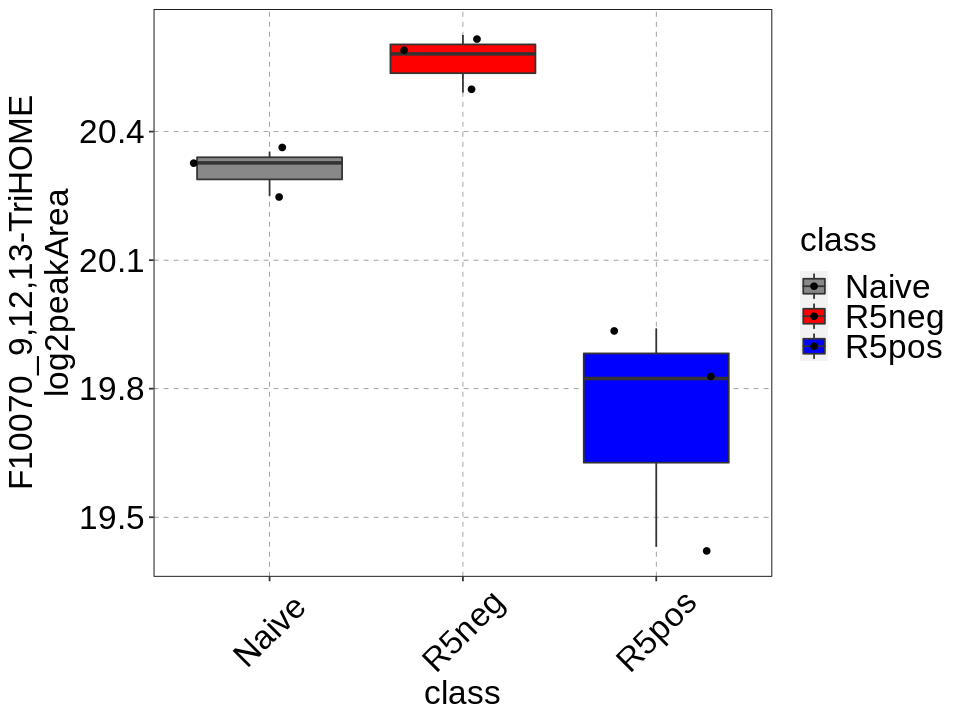

In [67]:
var <- sym('F10070')

metab_name <- lookUpAnnot(annot_df,var,'name_1st_guess')
box_plot(long_df = merged_df,
            x = 'class',
            y = var,
            xlab = 'class',
            ylab = glue('{var}_{metab_name}\nlog2peakArea'),
            fill_color = 'class',
            fig_width = 8,
            fig_height = 6,
            text_size = 20,
            legend_size = 20,
            axis_title_size = 20,
            output_dir = output_dir,
            pdf_prefix = 'test')

# Wrapper for plotting out multiple

In [68]:
head(merged_df)

,class,biological_samples,cell_number,F1,F10000,F10006,F10010,F10015,F10016,F10027,⋯,F9936,F994,F995,F9954,F9962,F9968,F9970,F9981,F9990,F9998
,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Naive_1,Naive,Yes,300,14.72954,15.98142,18.79916,17.92340,20.37120,17.12145,21.42504,⋯,25.55884,19.15886,17.91305,23.51617,19.03490,19.27893,26.35280,19.31171,14.90327,18.87144
Naive_2,Naive,Yes,300,16.52419,15.86099,19.33012,16.88182,20.89797,15.98553,21.53978,⋯,25.62812,19.25873,18.23975,23.60318,20.66802,19.33234,26.38529,19.61095,14.90327,18.56842
Naive_3,Naive,Yes,300,16.46507,15.61386,19.20292,17.93462,20.62601,15.98553,21.53049,⋯,25.53172,19.23401,18.06759,23.37617,20.05068,19.70023,26.32644,19.45773,14.90327,18.47099
R5neg_1,R5neg,Yes,655,17.00695,12.01507,19.18923,18.26877,22.32947,15.98553,21.81594,⋯,25.77872,19.50317,18.62974,24.26431,22.04669,19.81345,26.53825,19.79342,16.13378,16.12769
R5neg_2,R5neg,Yes,687,17.09726,12.01507,19.07756,18.04683,21.69557,15.98553,21.73381,⋯,25.60288,19.48237,18.45377,23.99680,21.20052,19.78606,26.36209,19.83069,18.11706,16.12769
R5neg_3,R5neg,Yes,865,17.05882,12.01507,19.35677,18.40138,22.37180,15.98553,21.88833,⋯,25.70275,19.58235,18.71740,24.25144,22.28516,19.96962,26.44280,20.19841,18.58218,16.12769


In [69]:
listOfFeatures = colnames(merged_df)[grepl('F[0-9]',colnames(merged_df))] # 

In [70]:
# install.packages("ggpubr")
library(ggpubr)

In [ ]:
fig_l = list()
for (i in 1:length(listOfFeatures)) {

    pdf_prefix = paste('test',cutoff_column,threshold, sep = "_") # 

    featID <- listOfFeatures[[i]]
    metab_name <- lookUpAnnot(annot_df,sym(featID),'name_1st_guess')

    fig_l[[i]] <- box_plot(long_df = merged_df,
                            x = 'class', #
                            y = sym(featID),
                            xlab = 'class', # 
                            ylab = glue('{featID}_{metab_name}\nlog2peakArea'),
                            fill_color = 'class',
                            fig_width = 4,
                            fig_height = 4,
                            text_size = 8, # important in report multiple ones.
                            legend_size = 8,
                            axis_title_size = 6,
                            output_dir = NULL, # no need to define, this is for single plot
                            pdf_prefix = NULL, # no need to define, this is for single plot
                            show_plot = FALSE)
                    }
multi.page <- ggarrange(plotlist = fig_l,
                        nrow = 3, ncol = 2)
ggexport(multi.page, filename = file.path(output_dir, 
                                          paste0("ggplot_multi_ggplot_",
                                                 pdf_prefix,
                                                 ".pdf")))


# library(ggpubr)
# 
# my_comparisons = list( c("0.5", "1"), c("1", "2"), c("0.5", "2") )
# 
# ggboxplot(ToothGrowth, x = "dose", y = "len",
#           color = "dose", palette = "jco")+ 
#   stat_compare_means(comparisons = my_comparisons, label.y = c(29, 35, 40))+
#   stat_compare_means(label.y = 45)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'F10524_[(4-{5,14-dihydroxy-3-methoxy-8,17-dioxatetracyclo[8.7.0.0²,⁷.0¹¹,¹⁶]heptadeca-1(10),2(7),3,5,11(16),12,14-heptaen-4-yl}-2-methylbut-2-en-1-yl)oxy]sulfonic acid' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'F10524_[(4-{5,14-dihydroxy-3-methoxy-8,17-dioxatetracyclo[8.7.0.0²,⁷.0¹¹,¹⁶]heptadeca-1(10),2(7),3,5,11(16),12,14-heptaen-4-yl}-2-methylbut-2-en-1-yl)oxy]sulfonic acid' in 'mbcsToSbcs': dot substituted for <81>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'F10524_[(4-{5,14-dihydroxy-3-methoxy-8,17-dioxatetracyclo[8.7.0.0²,⁷.0¹¹,¹⁶]heptadeca-1(10),2(7),3,5,11(16),12,14-heptaen-4-yl}-2-methylbut-2-en-1-yl)oxy]sulfonic acid' in 'mbcsToSbcs': dot substituted for <b7>”
Warning message in grid.Call(C_textBounds, as.